In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
import pandas as pd

In [17]:
bc_data = load_breast_cancer()

In [19]:
x = pd.DataFrame(bc_data.data, columns = bc_data.feature_names)

In [26]:
y = bc_data.target

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = rf.predict(x_test)

In [35]:
confusion_matrix(y_pred, y_test)

array([[40,  1],
       [ 4, 69]], dtype=int64)

In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.99      0.95      0.97        73

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [77]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [78]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [79]:
x = df.drop("Outcome", axis=1)

In [80]:
y = df['Outcome']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
rf = RandomForestClassifier(n_estimators=100, random_state=30)

In [83]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=30)

In [84]:
y_pred = rf.predict(x_test)

In [85]:
confusion_matrix(y_pred, y_test)

array([[77, 19],
       [22, 36]], dtype=int64)

In [86]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        96
           1       0.65      0.62      0.64        58

    accuracy                           0.73       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [87]:
from sklearn.linear_model import LogisticRegression

In [90]:
from sklearn.preprocessing import StandardScaler

In [95]:
standard = StandardScaler()

In [97]:
x_scaler = standard.fit_transform(x)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=42)

In [99]:
model = LogisticRegression()

In [100]:
model.fit(x_train, y_train)

LogisticRegression()

In [101]:
y_pred = model.predict(x_test)

In [103]:
confusion_matrix(y_pred, y_test)

array([[79, 18],
       [20, 37]], dtype=int64)

In [105]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.67      0.65      0.66        57

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [106]:
import matplotlib.pyplot as plt

In [107]:
from sklearn.cluster import KMeans

In [108]:
from sklearn.datasets import make_blobs

In [110]:
x, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)

In [111]:
scaler = StandardScaler()

In [112]:
x_scaled = scaler.fit_transform(x)

In [114]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [115]:
kmeans.fit(x_scaled)

KMeans(n_clusters=4, random_state=42)

In [146]:
labels = kmeans.labels_

In [147]:
center = kmeans.cluster_centers_

Text(0, 0.5, 'interia')

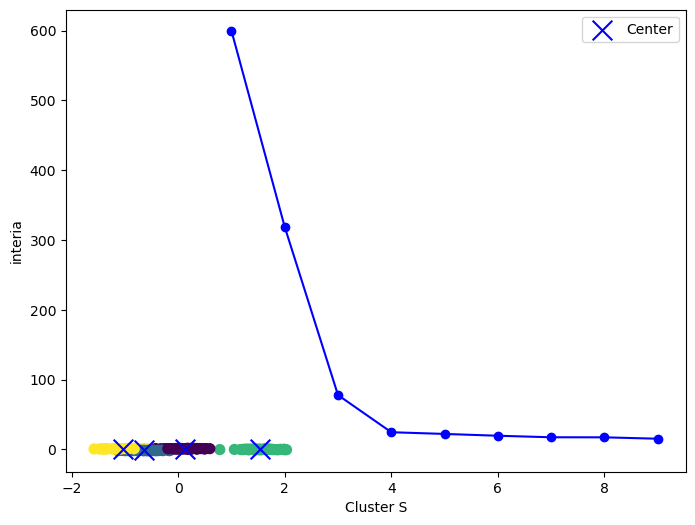

In [152]:
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=labels, cmap='viridis', s=50)
plt.scatter(center[:,0], center[:,1], c='blue', marker='x', s=200, label='Center')
plt.xlabel('1')
plt.ylabel('2')
plt.legend()

inters = []
kl = range(1, 10)
for k in kl:
    model = KMeans(n_clusters=k, random_state=42).fit(x_scaled)
    inters.append(model.inertia_)
            
plt.plot(kl, inters, 'bo-')
plt.xlabel('Cluster S')
plt.ylabel('interia')

In [153]:
from sklearn.decomposition import PCA

In [154]:
x, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)

In [155]:
x_scaled = StandardScaler().fit_transform(x)

In [156]:
x_pca = PCA(n_components=2).fit_transform(x_scaled)

In [157]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [159]:
labels = kmeans.fit_predict(x_pca)

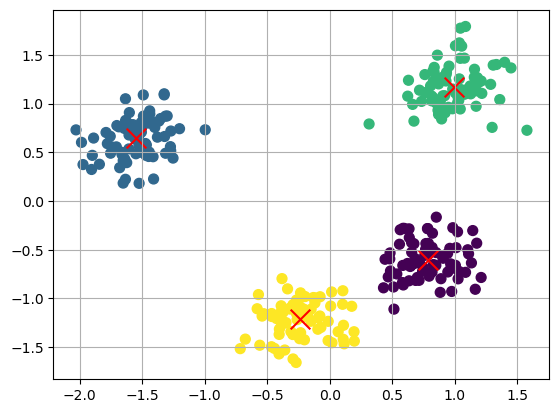

In [164]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='x', s=200, label='Center')
plt.grid(True)